# Dataset: *ottawashooting*

- df.to_csv(r'D:\論文\PHEME9\Data\CSV\ottawashooting-df.csv',index=False)
- src_tw_df.to_csv(r'D:\論文\PHEME9\Data\CSV\ottawashooting-src.csv',index=False)

In [1]:
import numpy as np
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,ImageColorGenerator
import nltk
from nltk import FreqDist, word_tokenize

In [2]:
df = pd.read_csv(r'D:\論文\PHEME9\Data\CSV\ottawashooting-df-2.csv', encoding = 'utf-8', header = 0)
print(df.columns)
print(df.shape)
df.head(1)

Index(['src_tweet_id', 'src_user_id', 'src_tweet', 'src_date',
       'reply_tweet_id', 'reply_user_id', 'reply_tweet', 'reply_date', 'label',
       'cleaned_reply_tw', 'reply_sentiment', 'reply_emo_ro'],
      dtype='object')
(10378, 12)


,src_tweet_id,src_user_id,src_tweet,src_date,reply_tweet_id,reply_user_id,reply_tweet,reply_date,label,cleaned_reply_tw,reply_sentiment,reply_emo_ro
0,524922078638903296,18999969,Ottawa police are confirming a shooting at the...,Wed Oct 22 13:55:50 +0000 2014,524922392582586368,2433907530,.@dominiquehardy @CBCOttawa related to St-Jean ?,Wed Oct 22 13:57:05 +0000 2014,0,relate stjean,Neutral,sadness


In [3]:
src_tw_df = pd.read_csv(r'D:\論文\PHEME9\Data\CSV\ottawashooting-src-2.csv', encoding = 'utf-8', header =0)
print(src_tw_df.columns)
print(src_tw_df.shape)
src_tw_df.head(1)

Index(['src_tweet_id', 'src_user_id', 'src_tweet', 'src_date', 'label',
       'cleaned_src_tw', 'src_sentiment', 'src_emo_ro'],
      dtype='object')
(857, 8)


,src_tweet_id,src_user_id,src_tweet,src_date,label,cleaned_src_tw,src_sentiment,src_emo_ro
0,524922078638903296,18999969,Ottawa police are confirming a shooting at the...,Wed Oct 22 13:55:50 +0000 2014,0,ottawa police confirm shoot war memorial minut...,Negative,anger


In [4]:
src_tw_df.loc[src_tw_df.cleaned_src_tw.isnull(),['src_tweet_id','src_tweet','cleaned_src_tw','src_sentiment']]

,src_tweet_id,src_tweet,cleaned_src_tw,src_sentiment
62,524939821815721984,RT @ctvmercedes: Ottawa: don't tweet your loca...,NaN,Neutral
64,524940623594287104,RT @bts_bighit: [Episode] #BTS 'War of Hormone...,NaN,Neutral
182,524960277348233216,RT @scottbix: Incredible shot: A woman gives m...,NaN,Neutral
386,525061246702587904,"RT @cfedio: Being told at CBC Ottawa that ""sit...",NaN,Neutral
428,524927288077746176,RT @WatchCTVNews: LIVE NOW: Cops swarm Parliam...,NaN,Neutral
515,524944006577668096,RT @CBCOttawa: CONFIRMED | 1 shooter shot dead...,NaN,Neutral
747,525020620636307456,RT @ArmedResearch:#ISIS Media account posts pi...,NaN,Neutral


In [4]:
df1 = pd.merge(df, src_tw_df[['src_tweet_id','cleaned_src_tw','src_sentiment','src_emo_ro']],\
               on='src_tweet_id')
df1.head(1)

,src_tweet_id,src_user_id,src_tweet,src_date,reply_tweet_id,reply_user_id,reply_tweet,reply_date,label,cleaned_reply_tw,reply_sentiment,reply_emo_ro,cleaned_src_tw,src_sentiment,src_emo_ro
0,524922078638903296,18999969,Ottawa police are confirming a shooting at the...,Wed Oct 22 13:55:50 +0000 2014,524922392582586368,2433907530,.@dominiquehardy @CBCOttawa related to St-Jean ?,Wed Oct 22 13:57:05 +0000 2014,0,relate stjean,Neutral,sadness,ottawa police confirm shoot war memorial minut...,Negative,anger


In [5]:
print("df's shape: ",df.shape)
print("df1's shape: ",df1.shape)
print("src_tw_df's shapes: ", src_tw_df.shape)

df's shape:  (10378, 12)
df1's shape:  (10378, 15)
src_tw_df's shapes:  (857, 8)


In [ ]:
src_null = df1.loc[df1.cleaned_src_tw.isnull()].index

In [ ]:
#df1.drop(src_null,0).shape

## Sentiment Analysis

In [6]:
src_tw_df.label.value_counts(normalize=True)

1    0.533256
0    0.466744
Name: label, dtype: float64

### Source Tweets 

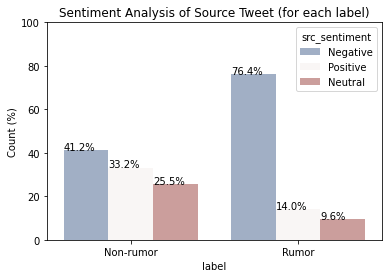

In [7]:
g = src_tw_df.groupby(['label'])['src_sentiment'].value_counts(normalize=True).mul(100).rename('count').reset_index()\
.pipe((sns.barplot,'data'), x ='label',y='count',hue='src_sentiment',palette="vlag")

g.axes.set_ylim(0,100)
g.axes.set_xticklabels(['Non-rumor','Rumor'])
g.axes.set_ylabel('Count (%)')
g.axes.set_title('Sentiment Analysis of Source Tweet (for each label)')

for p in g.axes.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.axes.text(txt_x,txt_y,txt)
plt.savefig('D:/論文/PHEME9/Code/graph/ottawashooting/src-sentiment.pdf',dpi=300)

Text(0.5, 1.0, '# of rumor/non-rumor Source tweet (for each sentiment class).')

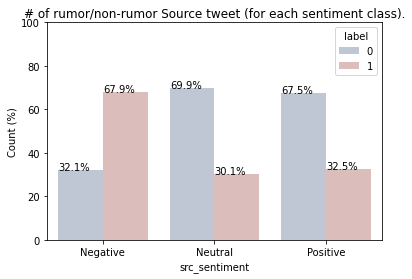

In [8]:
g = src_tw_df.groupby(['src_sentiment'])['label'].value_counts(normalize=True).mul(100).rename('count').reset_index()\
.pipe((sns.barplot,'data'), x ='src_sentiment',y='count',hue='label',palette="vlag")

g.axes.set_ylim(0,100)
g.axes.set_ylabel('Count (%)')

for p in g.axes.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.axes.text(txt_x,txt_y,txt)
plt.title('# of rumor/non-rumor Source tweet (for each sentiment class).',fontsize=12)

### Reply Tweets

In [9]:
df.reply_sentiment.value_counts(normalize=True)

Negative    0.365388
Positive    0.340046
Neutral     0.294565
Name: reply_sentiment, dtype: float64

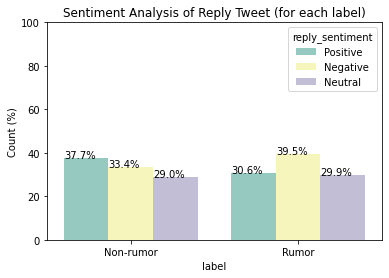

In [10]:
g = df.groupby(['label'])['reply_sentiment'].value_counts(normalize=True).mul(100).rename('count').reset_index()\
.pipe((sns.barplot,'data'), x ='label',y='count',hue='reply_sentiment',palette="Set3")

g.axes.set_ylim(0,100)
g.axes.set_title('Sentiment Analysis of Reply Tweet (for each label)')
g.axes.set_xticklabels(['Non-rumor','Rumor'])
g.axes.set_ylabel('Count (%)')

for p in g.axes.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.axes.text(txt_x,txt_y,txt)
plt.savefig('D:/論文/PHEME9/Code/graph/ottawashooting/reply-sentiment.pdf',dpi=300)

Text(0.5, 1.0, '# of rumor/non-rumor Reply tweet (for each sentiment class).')

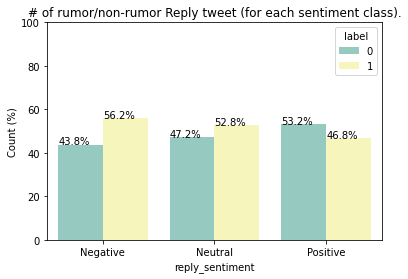

In [11]:
g = df.groupby(['reply_sentiment'])['label'].value_counts(normalize=True).mul(100).rename('count').reset_index()\
.pipe((sns.barplot,'data'), x ='reply_sentiment',y='count',hue='label',palette="Set3")

g.axes.set_ylim(0,100)
g.axes.set_ylabel('Count (%)')

for p in g.axes.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.axes.text(txt_x,txt_y,txt)
plt.title('# of rumor/non-rumor Reply tweet (for each sentiment class).',fontsize=12)

## Emotion Analysis

### Source Tweets

In [12]:
src_tw_df['src_emo_ro'].value_counts(normalize=True)

anger       0.472579
sadness     0.336056
joy         0.130688
optimism    0.060677
Name: src_emo_ro, dtype: float64

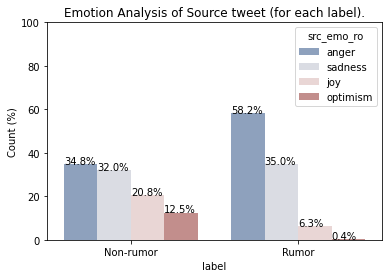

In [13]:
g = src_tw_df.groupby(['label'])['src_emo_ro'].value_counts(normalize=True).mul(100).rename('count').reset_index()\
.pipe((sns.barplot,'data'), x ='label',y='count',hue='src_emo_ro',palette="vlag")

g.axes.set_ylim(0,100)
g.axes.set_xticklabels(['Non-rumor','Rumor'])
g.axes.set_ylabel('Count (%)')

for p in g.axes.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.axes.text(txt_x,txt_y,txt)
plt.title('Emotion Analysis of Source tweet (for each label).',fontsize=12)
plt.savefig('D:/論文/PHEME9/Code/graph/ottawashooting/src-emotion.pdf',dpi=300)

### Reply Tweets

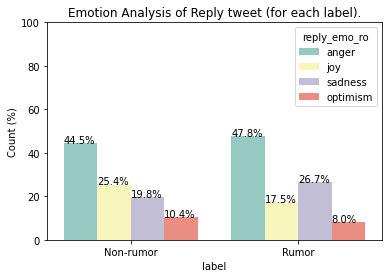

In [14]:
g =df.groupby(['label'])['reply_emo_ro'].value_counts(normalize=True).mul(100).rename('count').reset_index()\
.pipe((sns.barplot,'data'), x ='label',y='count',hue='reply_emo_ro',palette="Set3")

g.axes.set_ylim(0,100)
g.axes.set_xticklabels(['Non-rumor','Rumor'])
g.axes.set_ylabel('Count (%)')

for p in g.axes.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.axes.text(txt_x,txt_y,txt)
plt.title('Emotion Analysis of Reply tweet (for each label).',fontsize=12)
plt.savefig('D:/論文/PHEME9/Code/graph/ottawashooting/reply-emotion.pdf',dpi=300)